<a href="https://colab.research.google.com/github/Yassmina-Abdo/numerical-algorithms/blob/main/Final_Exam_BFGS_for_Single_Variable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Single Variable Linear Regression
### Use BFGS Method to optimize a LR model for the data provided in the attached file.
### Use Multivariable gradient descent to solve the same problem.
### Evaluate Gradient descent solution and BFGS solution using r2_score.
### Plot the following curves:
#### - Cost vs. iterations.
#### - Cost vs. each parameter.
### Find the solution using sklearn.linear_model.LinearRegression model.
### Compare the results from Gradient descent, BFGS, and sklearn models. Write your conclusion in brief.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Read Data

In [ ]:
data= pd.read_csv('RegData.csv',header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [ ]:
X_= np.array(data.iloc[:,0]).reshape(-1,1)
Y= np.array(data.iloc[:,-1]).reshape(-1,1)
#test
print(X_.shape)
print(Y.shape)

(13, 1)
(13, 1)


In [ ]:
X0=np.array(np.ones( (X_.shape[0],1 )))
X= np.concatenate((X0,X_),axis=1)
#test
print(X.shape)

(13, 2)


In [326]:
def Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred):

  plt.plot(np.array(thetas)[:,0],np.array(costs))
  plt.xlabel('theta0')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array(thetas)[:,1],np.array(costs))
  plt.xlabel('theta1')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array( costs),)
  plt.xlabel('epochs')
  plt.ylabel('cost')
  plt.show()

  plt.scatter(X[:,1],Y)
  [plt.plot(X[:,1],i) for i in hypotheses]
  plt.xlabel('X')
  plt.ylabel('Fited Lines ')
  plt.show()

  plt.scatter(X[:,1],Y)
  plt.plot(X[:,1],y_pred)
  plt.xlabel('X')
  plt.ylabel('Y predict')
  plt.show()

## BFGS Method

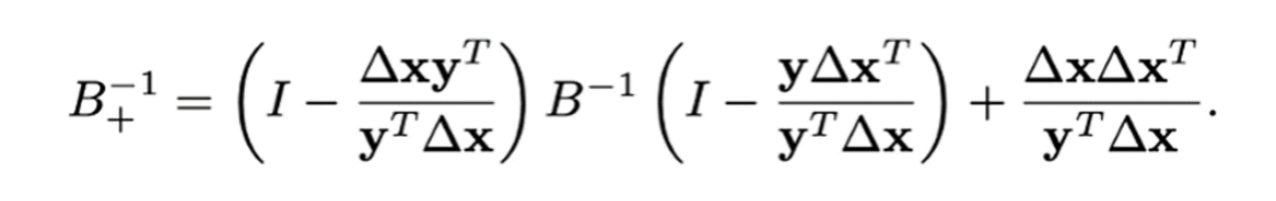

In [339]:
def B_inv(theta,theta_prev,grad,grad_prev,b_inv):
  eye= np.eye(2)
  delta_theta= theta-theta_prev 
  y= grad-grad_prev             
  p1= eye-((delta_theta@y.T) /(y.T @ delta_theta))
  p2= eye-((y@delta_theta.T) /(y.T @ delta_theta))
  p3= (delta_theta@delta_theta.T) /(y.T @ delta_theta)
  return p1@b_inv@p2+p3

In [345]:
def BFGS(X,Y,epochs,eps=0.001):
  #Defines
  m= len(X)
  thetas,hypotheses,costs=[],[],[]
  theta = np.zeros((X.shape[1],1))
  grad= (1/m)* (X.T @ ((X @ theta) - Y))
  b_inv=np.eye(X.shape[1])
  ##
  for i in range(epochs):
    thetas.append(theta.copy())
    hypo = X @ theta #1. Calculate hypotheses(ypred)
    hypotheses.append(hypo)
    cost = 1/(2*m) * sum(np.square(hypo-Y))  #2. Calculate cost  
    costs.append(cost)
    theta_prev= theta #3. Updata theta
    theta= theta - (b_inv @ grad)
    grad_prev=grad #4 calc gradient
    grad= (1/m )* (X.T @ ((X @ theta) - Y))

    if np.linalg.norm(grad) < eps: break           
    b_inv= B_inv(theta,theta_prev,grad,grad_prev,b_inv) 
  return thetas,theta,costs,hypotheses

In [346]:
def Run_BFGS(X,Y,epochs):
   thetas,theta,costs,hypotheses = BFGS(X,Y,epochs,eps=1e-3)
   y_pred = X @ theta
   print(r2_score(Y, y_pred))
   Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred)

Stopped at iteration 4
0.8213156778363777


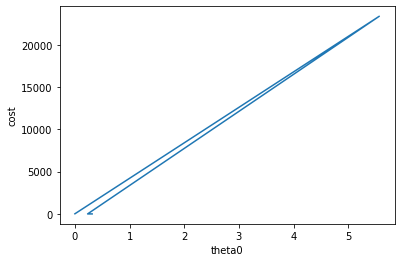

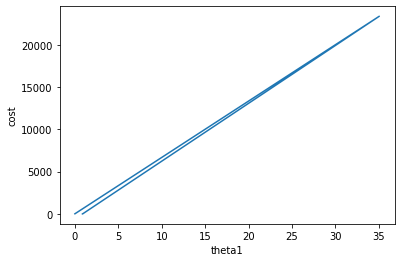

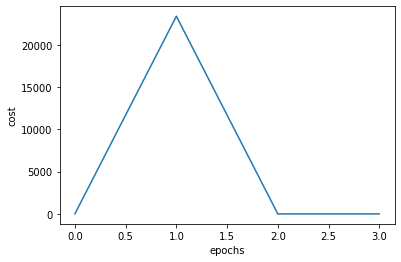

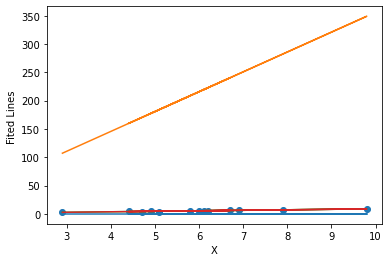

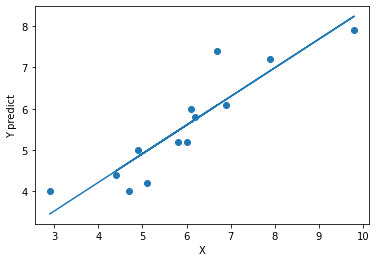

In [344]:
Run_BFGS(X,Y,epochs=10)

## Gradient Descent

In [336]:
def Batch_GD(X,Y,alpha,epochs,stopping_threshold=0.01):
  #Defines
  thetas,hypotheses,costs=[],[],[]
  theta= np.array(np.zeros((X.shape[1],1 )))
  m= len(X)
  ##
  for i in range(epochs):
    thetas.append(theta.copy())
    hypo = X @ theta #1. Calculate hypotheses(ypred)
    hypotheses.append(hypo)
    cost = 1/(2*m) * sum(np.square(hypo-Y)) #2. Calculate cost
    costs.append(cost)
    #-- Stop !? --
    if i>0:
      if (abs(costs[i]-costs[i-1]) <= stopping_threshold) : break
    theta -= alpha*(1/m )* (X.T @ ((X @ theta) - Y))  #3. Updata theta  

  return thetas,theta,costs,hypotheses

In [337]:
def Run_Batch_GD(X,Y,alpha,epochs):
   thetas,theta,costs,hypotheses = Batch_GD(X,Y,alpha,epochs,stopping_threshold=1e-3)
   y_pred = X @ theta
   print(r2_score(Y, y_pred))
   Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred)

0.7473756021508766


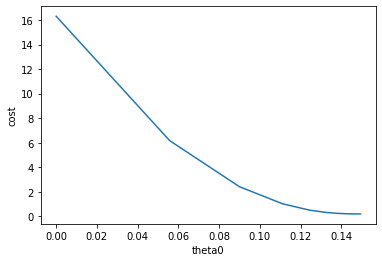

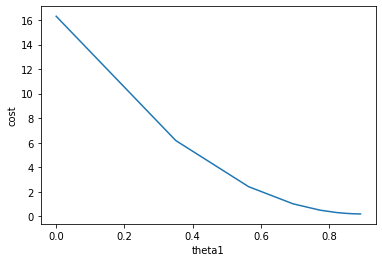

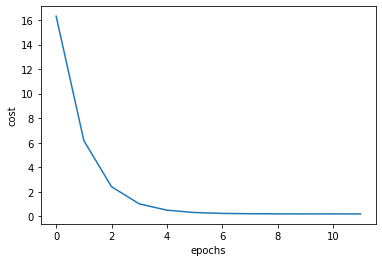

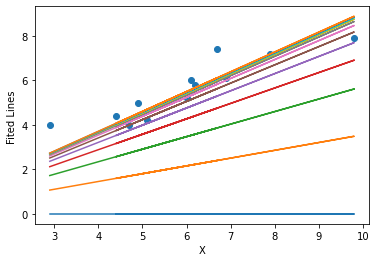

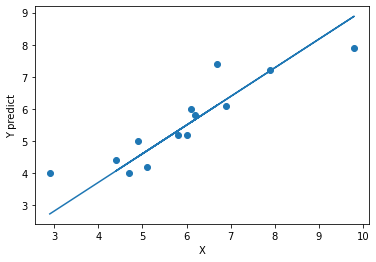

In [338]:
Run_Batch_GD(X,Y,alpha=0.01,epochs=500)

### Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))

0.8213156778363776


#**ConClusion** 



Bfgs can converge in only 4 iterations with a high score,
but in case gradient descent and sklearn can both can converge in more iterations with a less score.